# Assignment 2: Neural Network in Pytorch

## Section 1 Background and Instructions


## Background

Neural Networks are a class of algorithms, loosely modeled after human biological neural networks in the brain. They are instrumental in extracting patterns out of the dataset provided. Most of the present day advancements in Artificial Intelligence are made possible by the different variants of neural networks. 

## Assignment
In this assignment, we will develop a Neural Network and write the entire training loop of that Neural Network using a library called Pytorch. Pytorch, released by Meta (also known as Facebook) is perhaps today the most popular package used to develop a neural network. We are going to implement the backpropagation algorithm in Pytorch. Backpropagation was first postulated roughly 40 years ago by Geoffrey Hinton - one of the authority figures in Deep Learning today. He was awarded the Turing Prize for his contributions. 

## Instructions

Complete the starter code methods provided without changing their signatures or return values. 

### Note:
You are expected to write code where you see **your code here**.  
Make sure you delete the lines with **raise NotImplementedError** or your code may not run correctly.

## Import Libraries

The code cell below contains the basic python packages you will need to complete this assignment. Do not update
the python package or add new ones. Doing so will may cause the autograder to fail.

In [1]:
#Basic libraries for functionalities
import numpy as np              #numpy library stands for numerical python - they create a datatype called arrays which speeds up calculation
import matplotlib.pyplot as plt #matplotlib is a library used for drawing graphs and plotting
import random                   #used to create random datasets

## About Pytorch
Building a Deep Learning model is a customizable process; for example, someone may want to build a Deep Learning model to extract large features from an image, whereas someone else may only want to extract small features from it. In order to address this, packages were developed for creating Deep Learning models, such as tensorflow, keras and Pytorch. Pytorch is the perhaps the package most widely used by developers. This framework provides Deep Learning model building blocks that developers can assemble for their needs.

## PyTorch Blitz
Here is a quick introduction to PyTorch(60 minutes) provided by the developers of PyTorch itself. Please watch it if you are new to PyTorch. 
https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [2]:
#More libraries for implementing our neural network
import torch                                        #pytorch library 
from torch.utils.data import DataLoader, Dataset    #importing the dataset and dotaloader class which we will use to input the data
import torch.optim as optim                         #optimizer for pytorch
import torch.nn as nn                               #neural network module to write the network architecture
import torch.nn.functional as F                     #neural network module to write the network architecture
import torchvision as thv                           #torch vision to work on images in the dataset
from torchvision.datasets import MNIST              #library to import/download the MNIST datset
import torchvision.transforms as T                  #torchvision module to do data transformation
from copy import deepcopy 

## Section 2: Data and it's Preprocessing

## Get Data 

We provide the dataset in the local MNIST directory. Run the following function `get_data()`to return the training and validation datasets as `train` and `val`. The training images and labels are coupled together and will be called `train` in the `get_data()` method. In the same way, the validation (testing) images and labels are coupled together and will be called `val`.

In [3]:
def get_data():
    
    """
    return - the training and validation datasets along with their lables. (output type: torchvision dataset)
    """
    train = MNIST('./', download=False, train=True)
    val = MNIST('./', download=False, train=False)

    return train, val

In [4]:
mnist_train, mnist_val = get_data()  

## Subsampling of Dataset
The training dataset contains 60,000 images, and we will select only 30,000 of them. The testing dataset contains 10,000 images, and we will select 5,000 of them. The function `subsample` takes the input of how many samples we want. 

Along with subsampling, we will also normalize our dataset by dividing the feature data by 255 (maximum value) because it provides stability while training.

In [6]:
def subsample(X, Y, num_samples, num_classes):
    """
    X: Feature set, as a 2D numpy array
    Y: Labels, as a 1D numpy array
    num_samples: Total number of samples required after subsampling
    num_classes: Number of unique classes in the dataset
    
    Return: subsampled_X, subsampled_Y subsampled dataset
    """

    # your code here
    

    ### Uncomment each line of code and complete as needed

    # Flatten X and change type
    X = X.reshape(X.shape[0], -1).astype(np.float32)                         #use the reshape and the shape function to flatten X data          
    
    # Normalize X
    X = X / 255.0                                                               #Normalize with the value of 255
    # Calculate the final size of each class
    class_size = num_samples // num_classes                                         #Each class size is given by dividing the total samples by the number of classes
    indices = []

    for label in range(num_classes):  
        label_indices = np.argwhere(Y == label)[:class_size].flatten()           # Find indices for the given label and select the first class_size elements           
        indices.extend(label_indices)                                                   # Keep on extending the list based upon label indices
    indices = np.array(indices)
    subsampled_X = X[indices]                                                    # Get the subsampled values
    subsampled_Y = Y[indices]                                                    # Get the subsampled values

    return subsampled_X, subsampled_Y

## Calling the subsample two times 
Notice that we have called the `subsample` function twice, once to create the train dataset and once to create the validation dataset. 

In [7]:
trainX, trainY = subsample(X=mnist_train.data.numpy(), Y=mnist_train.targets.numpy(), num_samples=30000, num_classes=10)
valX, valY = subsample(X=mnist_val.data.numpy(), Y=mnist_val.targets.numpy(), num_samples=5000, num_classes=10)


In [8]:
###############################
##### TEST YOUR CODE HERE #####
###############################

def test_subsample_output_shape(X, Y, num_samples, num_classes):

    subsampled_X, subsampled_Y = subsample(X, Y, num_samples, num_classes)

    assert subsampled_X.shape[0] == num_samples, f"Expected {num_samples} samples, but got {subsampled_X.shape[0]}"
    assert len(subsampled_Y) == num_samples, f"Expected {num_samples} labels, but got {len(subsampled_Y)}"
    
test_subsample_output_shape(X=mnist_train.data.numpy(), Y=mnist_train.targets.numpy(), num_samples=30000, num_classes=10)
print("Output Shape Test Passed for training data")

test_subsample_output_shape(X=mnist_val.data.numpy(), Y=mnist_val.targets.numpy(), num_samples=5000, num_classes=10)
print("Output Shape Test Passed for Validation data")

Output Shape Test Passed for training data
Output Shape Test Passed for Validation data


In [9]:
###############################
##### TEST YOUR CODE HERE #####
###############################
def test_subsample_class_distribution(X, Y, num_samples, num_classes):

    subsampled_X, subsampled_Y = subsample(X, Y, num_samples, num_classes)
    
    unique, counts = np.unique(subsampled_Y, return_counts=True)
    expected_class_size = num_samples // num_classes

    for i, label in enumerate(range(num_classes)):
        assert counts[i] == expected_class_size, (
            f"Expected {expected_class_size} samples for class {label}, "
            f"but got {counts[i]}")
        
test_subsample_output_shape(X=mnist_train.data.numpy(), Y=mnist_train.targets.numpy(), num_samples=30000, num_classes=10)
print("Subsample Class Distribution Passed for training data")

test_subsample_output_shape(X=mnist_val.data.numpy(), Y=mnist_val.targets.numpy(), num_samples=5000, num_classes=10)
print("Subsample Class Distribution Passed for Validation data")

Subsample Class Distribution Passed for training data
Subsample Class Distribution Passed for Validation data


In [10]:
###############################
##### TEST YOUR CODE HERE #####
###############################
def test_subsample_normalization(X, Y, num_samples, num_classes):

    subsampled_X, _ = subsample(X, Y, num_samples, num_classes)
    
    assert np.all(subsampled_X <= 1.0) and np.all(subsampled_X >= 0.0), (
        "Normalization check failed: Features are not in the range [0, 1]")
    
test_subsample_output_shape(X=mnist_train.data.numpy(), Y=mnist_train.targets.numpy(), num_samples=30000, num_classes=10)
print("Normalization test is passed for training data")

test_subsample_output_shape(X=mnist_val.data.numpy(), Y=mnist_val.targets.numpy(), num_samples=5000, num_classes=10)
print("Normalizaiton test passed for testing data")

Normalization test is passed for training data
Normalizaiton test passed for testing data


## About MNIST dataset
In this assignment, we are going to work with the MNIST digit dataset. It’s a classic dataset with images of handwritten digits from 0 to 9. It's great for testing and teaching image recognition. Each image is labeled with the correct digit, so it’s a great starting point for experimenting with how well models can recognize and classify numbers. Here we are going to apply this on the neural network we are going to develop using PyTorch. 

We will create a custom dataset using the `Dataset` class in PyTorch. It helps us create the dataset which can later be used with the the `DataLoader` class of PyTorch to train and test our models. In Machine Learning (ML) and Deep Learning (DL), the majority of the time is spent working on preparing the data to be used by the model. That involves cleaning the dataset, organizing it, removing missing items, performing some transforms and many other activities. In order to make that job simpler, PyTorch introduced the Dataset class for our purpose - which helps us in creating and transforming our dataset in a customizable way. After the dataset has been created, the next task is to provide the model with small batches of data from the dataset - here in comes the use of DataLoader class which helps us in doing this action quite effectively. 

These elements are introduced in the PyTorch Blitz video linked earlier in the notebook; however, for more in-depth reading, see these two tutorials: 

* https://pytorch.org/tutorials/beginner/basics/data_tutorial.html. 

* https://www.youtube.com/playlist?list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4 - In this playlist, see video 09.

In [11]:
class MNISTDataset(Dataset):
    """
    Attributes:
    -----------
    x_data : numpy-array of subsampled Image Input
    y_data : numpy-array of subsampled Labels Input

    Methods:
    --------
    __len__():Returns the number of samples.

    __getitem__(idx):Retrieves the image and label at the given index (Tensor).
    """
    # your code here
    
    
    ### Uncomment each line of code and complete as needed
    
    def __init__(self, x_data, y_data):
        self.x_data = torch.tensor(x_data, dtype=torch.float32)       # In the constructor define the images and the labels
        self.y_data = torch.tensor(y_data, dtype=torch.long) 
        
    def __len__(self):
        return len(self.x_data)                                              #The length of the total dataset

    def __getitem__(self, idx):
        x = self.x_data[idx]                                              #This would ensure the retrieval of new datapoints  
        y = self.y_data[idx]
        return x, y



In [12]:
train_dataset = MNISTDataset(trainX, trainY)  
val_dataset = MNISTDataset(valX, valY)

In [13]:
###############################
##### TEST YOUR CODE HERE #####
###############################

def test_length(x_data, y_data, expected_length):
    dataset = MNISTDataset(x_data, y_data)

    dataset_length = len(dataset)
    assert dataset_length == expected_length, f"Expected dataset length {expected_length}, but got {dataset_length}"
    
test_length(x_data= trainX, y_data=trainY, expected_length = 30000 )
print("The length of the Train dataset is correct")

test_length(x_data= valX, y_data=valY, expected_length = 5000 )
print("The length of the Val dataset is correct")

The length of the Train dataset is correct
The length of the Val dataset is correct


In [14]:
###############################
##### TEST YOUR CODE HERE #####
###############################
def test_getitem(x_data, y_data):
    dataset = MNISTDataset(x_data, y_data)

    idx = 1
    expected_x = x_data[idx]
    expected_y = y_data[idx]
    x, y = dataset[idx]

    assert np.array_equal(x, expected_x), f"Expected x at index {idx} to be {expected_x}, but got {x}"
    assert y == expected_y, f"Expected y at index {idx} to be {expected_y}, but got {y}"
    
    
test_getitem(x_data = trainX, y_data=trainY)
print("Data Retrieval of Train dataset is Passed")
test_getitem(x_data = valX, y_data=valY)
print("Data Retrieval of Val dataset is Passed")

Data Retrieval of Train dataset is Passed
Data Retrieval of Val dataset is Passed


## Section 3 Neural Network 

## Define Neural Network in Pytorch
Neural networks in PyTorch are created using the `torch.nn` module. The `__init__` method specifies which layers are present in our network. You will notice that in the `__init__` method the linear layer has parameters 784 and 10. This is because we are taking our input dataset, composed of MNIST images of the size 28X28, and converting them to a linear vector of 784. The value 10 represents the number of possible outputs of the MNIST dataset. 


The `forward` method determines how the data will flow through the network. It shows which elements are applied upon the input data `x` and in what order to perform the forward pass of the datset. In the forward method we are applying `ReLU` upon our dataset after the fully connected layer `fc1`. This is the application of the activation function on our data to bring non-linearity into our model. Non-Linearity is at the heart of what makes neural networks capable of extracting features. 

In [17]:
class Net(nn.Module): 
    """
    A neural network with a single fully connected layer.

    Attributes:
    -----------
    fc1 :Fully connected layer with input size 784 (28X28) and output size 10 (number of samples).

    Methods:
    --------
    forward(x):Applies the forward pass using ReLU activation on the fully connected layer.
    
    Output:
    --------
    out: output of the application of the simple neural network on the dataset
    """ 
    
    # your code here
    
    
    ### Uncomment each line of code and get the answer
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 10)         #Define the sizes of the layer of the NN corresponding to the dataset

    def forward(self, x):
        out = F.relu(self.fc1(x))           # write out how the data flows through the model
        return out
    
    

In [18]:
net = Net() 

In [19]:
###############################
##### TEST YOUR CODE HERE #####
###############################
def test_initialization(net):
    assert isinstance(net.fc1, nn.Linear), "fc1 should be an instance of nn.Linear"
    assert net.fc1.in_features == 784, "fc1 input features should be 784"
    assert net.fc1.out_features == 10, "fc1 output features should be 10"
    print("Initialization test passed.")
    
test_initialization(net)
print("The Model is correctly initialized")

Initialization test passed.
The Model is correctly initialized


In [20]:
###############################
##### TEST YOUR CODE HERE #####
###############################
def test_forward_pass(net):
    dummy_input = torch.randn(1, 784)
    output = net(dummy_input)
    assert output.shape == (1, 10), "Output shape should be (1, 10)"
    assert output.dtype == torch.float32, "Output dtype should be float32"
    print("Forward pass test passed.")
    
    
test_forward_pass(net)
print("Forward pass is correctly initialized")

Forward pass test passed.
Forward pass is correctly initialized


## Section 4 Training and Evaluation of the Neural Network
After defining our dataset and our model above, we train and evaluate our model. If you look at the code in this section, you will notice that the validation method, `validate_pytorch_NN`, is defined first and then the training loop, `train_pytorch_nn`. This has been done purposefully, because we are calling the validation function from the training loop. A recommendation is that you start coding from the training loop and then circle back to validation loop.

## Validation of Pytorch Neural Network
Here we have written the `validate_pytorch_NN` method. It takes the trained model, implements it on the testing (validation) dataset, calculates the running loss, and finally outputs the average validation loss and average validation error. Here the key metric is the running loss. During the training and the evaluation (validation) of a neural network, it is run iteratively. The performance is tracked at each iteration, and the record keeping of that is called running loss. We will later plot the loss and the accuracy curves of the model. Those curves are characteristic of the performance of the model. 

In [21]:

def validate_pytorch_NN(net, val_dataloader):
    """
    Validate the PyTorch neural network with the given validation dataloader.
    
    net: The neural network model
    criterion: The loss function
    val_dataloader: DataLoader for the validation data
    
    Return: average validation loss and error
    """

    # your code here
    

    ### Uncomment each line of code and complete as needed

    # Initialize total validation loss and error
    val_loss, val_error = 0, 0
    criterion = nn.CrossEntropyLoss()

    # Iterate over all mini-batches from the validation dataset
    for x_val, y_val in val_dataloader:
        x_val = torch.Tensor(x_val)                      # Convert the data to tensor
        y_val = torch.Tensor(y_val).long()                     # Convert the data to tensor
    #     
    #     # Compute forward pass and error
        with torch.no_grad():
            val_out = net(x_val)  # Get model predictions
            val_loss += criterion(val_out, y_val).item()  # Compute running loss
            
            _, val_pred = torch.max(val_out, 1)  # Get predicted class
            val_error += np.sum(np.array(val_pred.cpu()) != y_val.cpu().numpy()) / y_val.shape[0]  # Compute running error
    # 
    # # Compute average validation loss and error
    avg_val_loss = val_loss / len(val_dataloader)  # Average loss
    avg_val_error = val_error / len(val_dataloader)  # Average error
    # 
    return avg_val_loss, avg_val_error


## Train Pytorch Neural Network

The training loop in PyTorch teaches your model to make better predictions. Start by passing your data through the model to get predictions. Then calculate how far off these predictions are from the actual values using a loss function. Next, update the model’s parameters to reduce this error, and repeat this process many times. Essentially, the training loop helps the model learn from its mistakes and improve over time.

### Steps of the Training Loop
1. Perform the forward pass on the data where the `model` is applied on the training dataset to generate an ouptut.
2. Perform the backpropagation where the gradients are set to zero using `optimizer.zero_grad()` and calculate the backward loss using `loss.backward()`
3. Update the model parameters using the `optimizer.step()`

In [25]:
def train_pytorch_nn(net, train_dataloader, val_dataloader):
    """
    Train a PyTorch neural network with the given parameters.
    
    train_dataloader: DataLoader for the training data
    val_dataloader: DataLoader for the validation data
    lr: Learning rate for the optimizer
    
    Return: Lists of training and validation losses and errors
    """

    # your code here
    

    ### Uncomment each line of code and complete as needed

    # Setup (e.g., seed initialization, if any) - Do not change these values
    torch.manual_seed(20)
    random.seed(20)
    np.random.seed(20)
    optimizer = optim.SGD(net.parameters(), lr=0.1)
    criterion = nn.CrossEntropyLoss()


    train_error_list = []
    train_loss_list = []
    val_error_list = []
    val_loss_list = []

#     # Calculate the total number of batches needed
    num_iterations = 3050
    iteration = 0

    while iteration < num_iterations:  # Loop until we reach 30,000 iterations
        for x, y in train_dataloader:
            if iteration >= num_iterations:
                break  # Stop if max iterations reached

            x = x  # Training input
            y = y  # Training labels

            # Forward pass
            outputs = net(x)  # Apply model on input data
            loss = criterion(outputs, y)  # Compute running loss
            _, predicted = torch.max(outputs, 1)  # Get class predictions
            err = np.sum(predicted.cpu().numpy() != y.cpu().numpy()) / x.shape[0]  # Compute running error

            # Backward pass and optimization
            optimizer.zero_grad()  # Zero out gradients
            loss.backward()  # Compute gradients
            optimizer.step()  # Update model parameters

            # Logging
            print(f"Iteration [{iteration}], "
                  f"Loss: {loss.item():.4f}, "
                  f"Error: {err:.4f}")

            train_loss_list.append(loss.item())  # Log loss
            train_error_list.append(err)  # Log error

            # Validation step
            if iteration % 1000 == 0:  # Validate every 1000 iterations
                val_loss, val_err = validate_pytorch_NN(net, val_dataloader)
                val_loss_list.append(val_loss)  # Log validation loss
                val_error_list.append(val_err)  # Log validation error

            iteration += 1  # Increment iteration

    return train_loss_list, train_error_list, val_loss_list, val_error_list



In [26]:
train_dataset = MNISTDataset(trainX, trainY) 
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = MNISTDataset(valX, valY)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [27]:

train_loss_list, train_error_list, val_loss_list, val_error_list = train_pytorch_nn(net, train_dataloader, val_dataloader)

Iteration [0], Loss: 2.2953, Error: 0.8750
Iteration [1], Loss: 2.2567, Error: 0.8125
Iteration [2], Loss: 2.1947, Error: 0.7656
Iteration [3], Loss: 2.1371, Error: 0.6719
Iteration [4], Loss: 2.0197, Error: 0.5625
Iteration [5], Loss: 2.0136, Error: 0.6406
Iteration [6], Loss: 2.0783, Error: 0.7500
Iteration [7], Loss: 2.0218, Error: 0.5625
Iteration [8], Loss: 1.8402, Error: 0.4531
Iteration [9], Loss: 2.0089, Error: 0.6406
Iteration [10], Loss: 1.8555, Error: 0.5000
Iteration [11], Loss: 1.7814, Error: 0.4844
Iteration [12], Loss: 1.6638, Error: 0.4062
Iteration [13], Loss: 1.7884, Error: 0.4688
Iteration [14], Loss: 1.6407, Error: 0.3125
Iteration [15], Loss: 1.8088, Error: 0.4688
Iteration [16], Loss: 1.5031, Error: 0.2812
Iteration [17], Loss: 1.8254, Error: 0.5312
Iteration [18], Loss: 1.6637, Error: 0.4688
Iteration [19], Loss: 1.4677, Error: 0.2812
Iteration [20], Loss: 1.4207, Error: 0.2500
Iteration [21], Loss: 1.5269, Error: 0.3750
Iteration [22], Loss: 1.5246, Error: 0.359

In [28]:
###############################
##### TEST YOUR CODE HERE #####
###############################

def test_train_function_runs(train_loss_list, train_error_list, val_loss_list, val_error_list):
    
    assert len(train_loss_list) > 0, "Train loss list is empty!"
    assert len(train_error_list) > 0, "Train error list is empty!"
    assert len(val_loss_list) > 0, "Validation loss list is empty!"
    assert len(val_error_list) > 0, "Validation error list is empty!"
    
test_train_function_runs(train_loss_list, train_error_list, val_loss_list, val_error_list)
print("The test_train_function is running correctly")

The test_train_function is running correctly


In [29]:
###############################
##### TEST YOUR CODE HERE #####
###############################
def test_training_loss_decrease(train_loss_list):
    
    assert train_loss_list[0] > train_loss_list[-1], (
        f"Expected training loss to decrease, but got initial loss {train_loss_list[0]} and final loss {train_loss_list[-1]}"
    )
test_training_loss_decrease(train_loss_list)
print("The training and validation loss decreases with learning")

The training and validation loss decreases with learning


In [30]:
###############################
##### TEST YOUR CODE HERE #####
###############################
def test_validation_loss_non_negative(net, val_dataloader):

    avg_val_loss, _ = validate_pytorch_NN(net, val_dataloader)
    
    assert avg_val_loss >= 0, f"Expected non-negative validation loss, but got {avg_val_loss}"
    
test_validation_loss_non_negative(net, val_dataloader)
print("The Test validation loss is non-negative")

The Test validation loss is non-negative


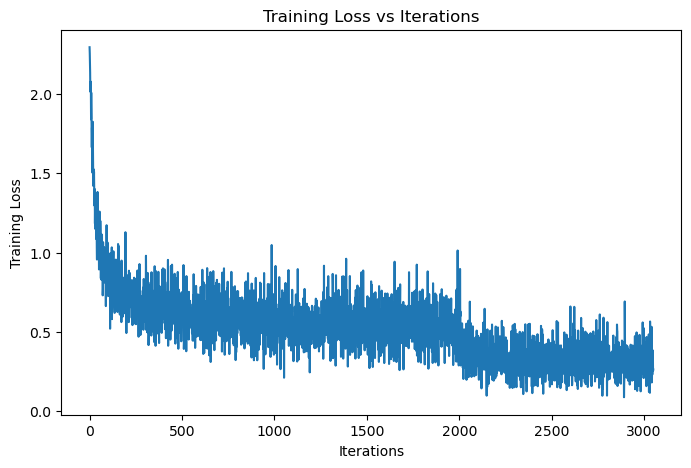

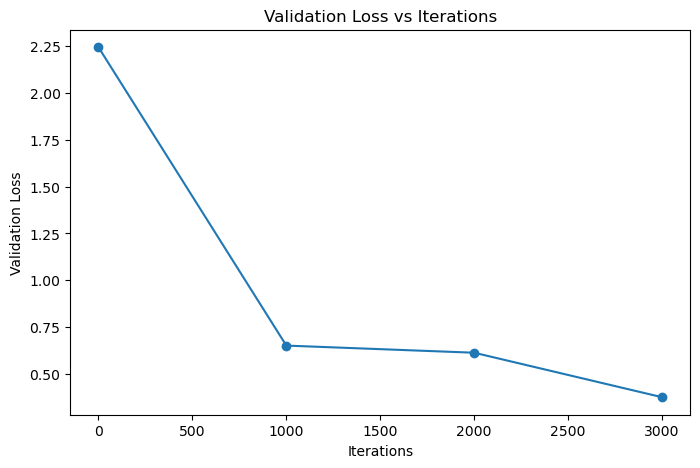

In [31]:

def plot_losses(train_loss_list, val_loss_list, val_interval=1000):
    """
    Plot separate training and validation losses.

    train_loss_list: List of training losses
    val_loss_list: List of validation losses
    val_interval: Interval of iterations when validation is calculated
    """
    val_iters = [i for i in range(0, len(train_loss_list), val_interval)]

    # Plot Training Loss
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(train_loss_list)), train_loss_list)
    plt.xlabel('Iterations')
    plt.ylabel('Training Loss')
    plt.title('Training Loss vs Iterations')
    plt.show()
    

    # Plot Validation Loss
    plt.figure(figsize=(8, 5))
    plt.plot(val_iters, val_loss_list, marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss vs Iterations')
    plt.show()

# # Example usage (assuming you have train_loss_list and val_loss_list):
# train_loss_list, train_error_list, val_loss_list, val_error_list = train_pytorch_nn(net, train_dataloader, val_dataloader)

# Plot the losses
plot_losses(train_loss_list, val_loss_list, val_interval=1000)


## Final Takeaways
Congratulations on finishing up the assignment. Here are some final points:

1. The graph we plotted at the very end shows that the training loss and validation loss both decrease with iterations performed. This is the model learning itself. 

2. We have not discussed many details about the neural network developed in this assignment. It is a simple linear single layer network used for learning purposes. However, how to construct a neural network to improve its performance is a whole topic in itself. 

3. You may have noticed that we used 3050 iterations for training. We are performing the validation step after every 1000 iterations. To clearly show three steps of validation learning, we used a value slightly above 3000. 

4. We generally train models 10 times more than what we did in this assignment. However, we have limited the iterations as a trade off for faster training. 
